In [39]:
import pandas as pd
import matplotlib.pyplot as plt


In [40]:
from sklearn.datasets import load_diabetes

In [41]:
df=load_diabetes()

In [42]:
df

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [43]:
print(df['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [44]:
df_diabetes = pd.DataFrame(df.data,columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])

In [45]:
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [46]:
X= df_diabetes
y= df['target']

In [47]:
### Split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25 ,random_state=0)

In [48]:
### Check the corr
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.161531,0.199182,0.374377,0.278057,0.238364,-0.097893,0.229502,0.284923,0.319720
sex,0.161531,1.000000,0.081986,0.256404,0.042435,0.144339,-0.357532,0.314384,0.140039,0.235086
bmi,0.199182,0.081986,1.000000,0.432713,0.255968,0.267426,-0.382282,0.414690,0.454033,0.392243
bp,0.374377,0.256404,0.432713,1.000000,0.259533,0.195864,-0.215710,0.288742,0.421525,0.411377
s1,0.278057,0.042435,0.255968,0.259533,1.000000,0.889024,0.012766,0.554083,0.532322,0.338349
s2,0.238364,0.144339,0.267426,0.195864,0.889024,1.000000,-0.232576,0.663937,0.318399,0.295124
s3,-0.097893,-0.357532,-0.382282,-0.215710,0.012766,-0.232576,1.000000,-0.755164,-0.406113,-0.305594
s4,0.229502,0.314384,0.414690,0.288742,0.554083,0.663937,-0.755164,1.000000,0.618368,0.442607
s5,0.284923,0.140039,0.454033,0.421525,0.532322,0.318399,-0.406113,0.618368,1.000000,0.491373
s6,0.319720,0.235086,0.392243,0.411377,0.338349,0.295124,-0.305594,0.442607,0.491373,1.000000


<Axes: >

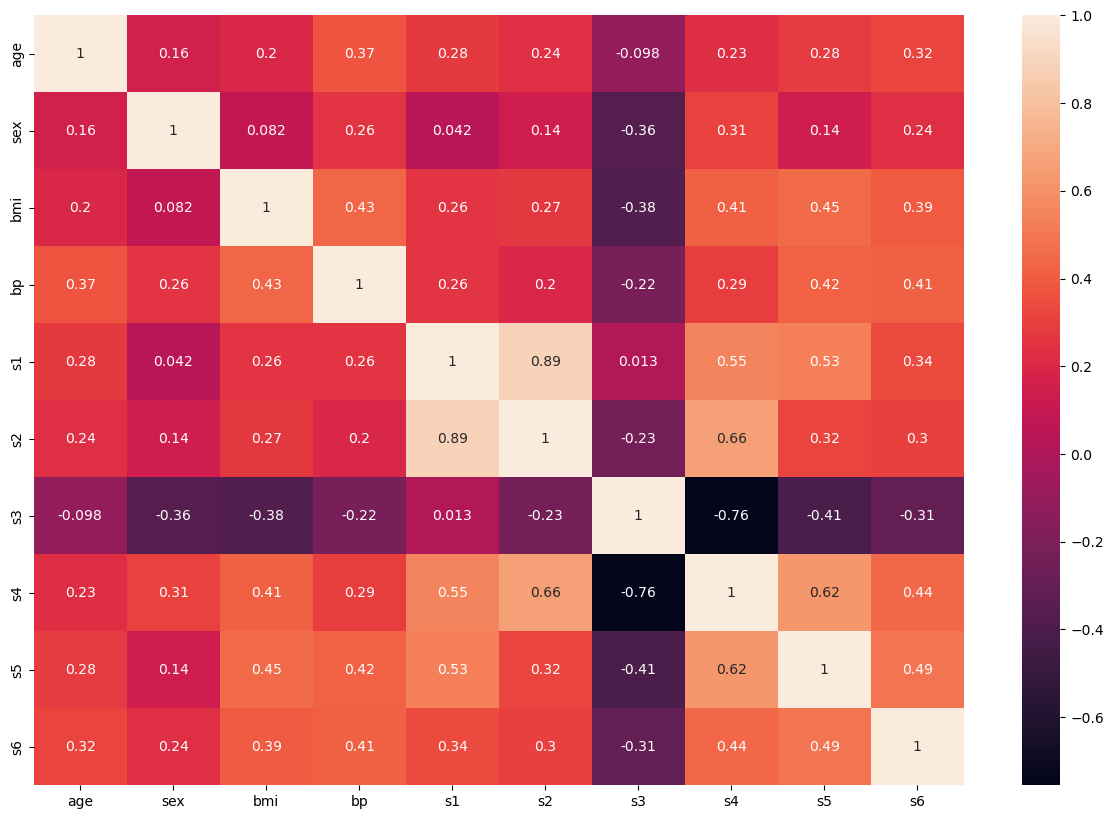

In [49]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True)

In [50]:
from sklearn.tree import DecisionTreeRegressor
decison_reg = DecisionTreeRegressor()
decison_reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [51]:
y_predict = decison_reg.predict(X_test)
# from sklearn.metrics import classification_report,confusion_matrix
# print(classification_report(y_predict,y_test))
# print(confusion_matrix(y_predict,y_test))

## Hyperparameter Tuning

In [61]:
params = {'criterion' : ["squared_error", "friedman_mse", "absolute_error","poisson"],
          'splitter' : ["best", "random"],
         'max_depth':[1,2,3,4,5,10,15,25],
         'max_features' :  ["auto","sqrt", "log2",None],
         }

In [62]:
params

{'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5, 10, 15, 25],
 'max_features': ['auto', 'sqrt', 'log2', None]}

In [63]:
from sklearn.model_selection import GridSearchCV
reg = DecisionTreeRegressor()

In [64]:
grid=GridSearchCV(reg,param_grid=params,cv=5,scoring='neg_mean_squared_error')

In [65]:
grid.fit(X_train,y_train)

C:\Users\samar\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
320 fits failed out of a total of 1280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\samar\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\samar\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\samar\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\samar\anaconda3\Lib\site-packa

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 25],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [66]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [67]:
y_predict_cv = grid.predict(X_test)

In [68]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(r2_score(y_predict_cv,y_test))
print(mean_absolute_error(y_predict_cv,y_test))
print(mean_squared_error(y_predict_cv,y_test))

-0.7340604836769651
54.15811034474183
4945.969149320515


In [69]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, lr_preds))
print("Decision Tree R2:", r2_score(y_test, y_predict))


Linear Regression R2: 0.3594088038177712
Decision Tree R2: -0.1959188961808207


# So linear regression is better becaause data is small and more linear so rather simple thing works more than complex one